In [6]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Add project root to system path to allow importing modules
sys.path.append(os.path.abspath('..'))

from backtest.engine import BacktestEngine

In [7]:
# Load the prepared datasets
df = pd.read_parquet('../data/final_dataset.parquet')
bench_df = pd.read_parquet('../data/benchmark_csi300_monthly.parquet')

print(f"Data Loaded. Shape: {df.shape}")

Data Loaded. Shape: (472008, 20)


In [8]:
FACTOR_NAME = 'Bm'  # This will be replaced by the script
print(f"Analyzing Factor: {FACTOR_NAME}")

# Initialize Engine with Benchmark
engine = BacktestEngine(df, factor_name=FACTOR_NAME, benchmark_df=bench_df)

Analyzing Factor: Bm


In [9]:
# Run analysis using Value-Weighted sorting (Academic Standard)
summary = engine.run_analysis(weighting='vw')

# Display Key Metrics
print("Performance Summary:")
for k, v in summary.items():
    print(f"{k}: {v:.4f}")

Running analysis for factor: Bm...


/opt/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Performance Summary:
IC_Mean: 0.0018
IC_IR: 0.0084
Factor_Autocorr: 0.7859
LS_Return: -0.0334
LS_Sharpe: -0.1805
FM_t_stat: 0.4186
Q5_Return: 0.0197
Q5_Sharpe: 0.2331
Q5_MaxDD: -0.6863
Q5_Turnover: 0.6785
Q5_Active_Return: -0.0312
Alpha: -0.0007
Beta: -0.0007


/Users/nachuanchen/Documents/Undergrad_Resources/资产管理与投资策略分析/AMQI/backtest/metrics.py:104: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return results.tvalues[0]
/Users/nachuanchen/Documents/Undergrad_Resources/资产管理与投资策略分析/AMQI/backtest/analyzer.py:224: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[0] # Slope


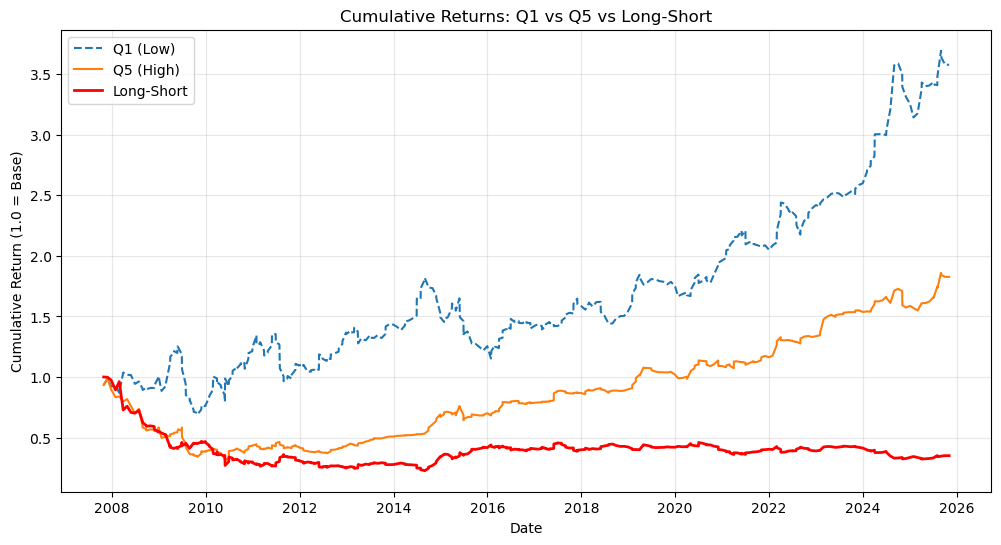

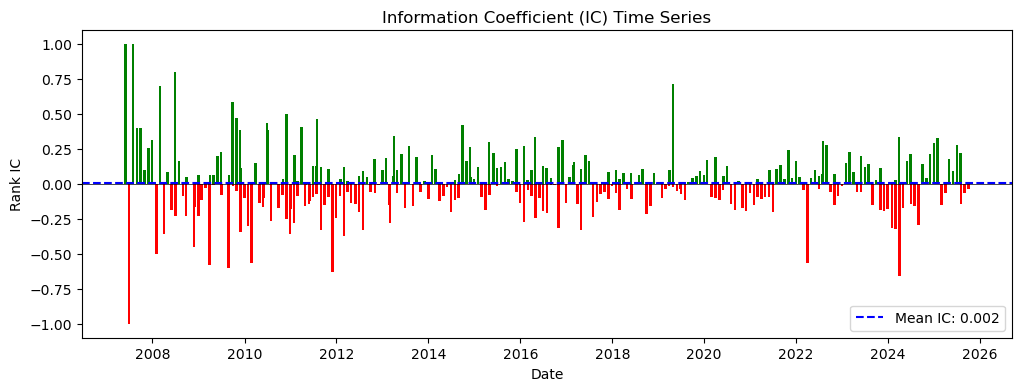

/Users/nachuanchen/Documents/Undergrad_Resources/资产管理与投资策略分析/AMQI/backtest/plotting.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ann_rets.index, y=ann_rets.values, palette='viridis')


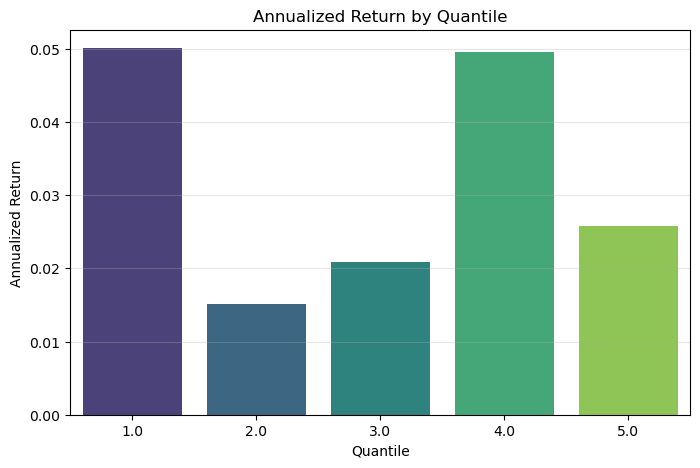

In [10]:
# Plot cumulative returns and IC series
engine.plot_results()
plt.show()